# 功能描述
从json 中提取 bbox 坐标，在图片中绘制出来
> [
	{"bbox_2d": [310, 275, 346, 389], "label": "there is some broken parts of paint on the wall"},
	{"bbox_2d": [382, 271, 406, 592], "label": "there is some broken parts of paint on the wall"},
	{"bbox_2d": [503, 271, 528, 496], "label": "there is some broken parts of paint on the wall"},
	{"bbox_2d": [718, 304, 756, 429], "label": "there is some broken parts of paint on the wall"}
]



原始图片尺寸: (4096, 1904)
缩略图尺寸: (1000, 465)


/var/folders/k4/ljbdc82s38943jq5glm4fx1m0000gn/T/ipykernel_35574/1392965983.py:94: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.tight_layout()
/var/folders/k4/ljbdc82s38943jq5glm4fx1m0000gn/T/ipykernel_35574/1392965983.py:94: UserWarning: Glyph 29255 (\N{CJK UNIFIED IDEOGRAPH-7247}) missing from current font.
  plt.tight_layout()
/var/folders/k4/ljbdc82s38943jq5glm4fx1m0000gn/T/ipykernel_35574/1392965983.py:94: UserWarning: Glyph 24050 (\N{CJK UNIFIED IDEOGRAPH-5DF2}) missing from current font.
  plt.tight_layout()
/var/folders/k4/ljbdc82s38943jq5glm4fx1m0000gn/T/ipykernel_35574/1392965983.py:94: UserWarning: Glyph 20174 (\N{CJK UNIFIED IDEOGRAPH-4ECE}) missing from current font.
  plt.tight_layout()
/var/folders/k4/ljbdc82s38943jq5glm4fx1m0000gn/T/ipykernel_35574/1392965983.py:94: UserWarning: Glyph 32553 (\N{CJK UNIFIED IDEOGRAPH-7F29}) missing from current font.
  plt.tight_layout()
/var/folders/k4/ljbdc82s38943jq5glm4fx1m0000gn/T/ipyker

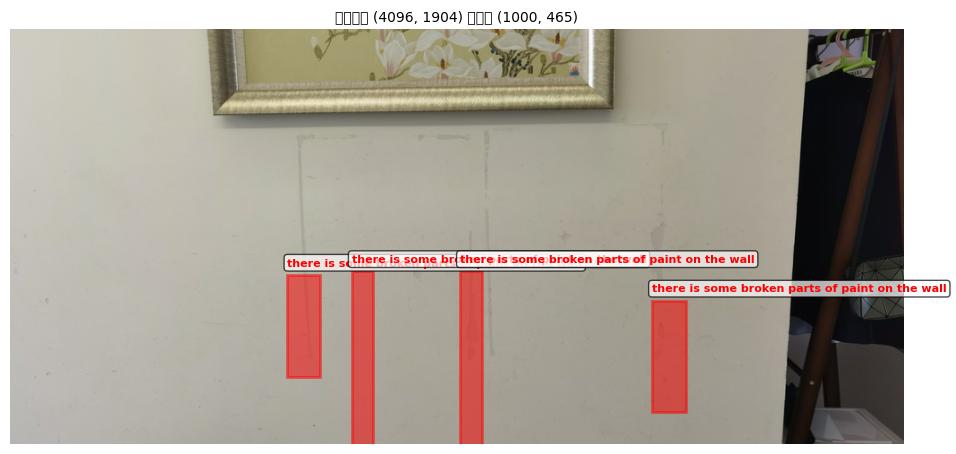

In [6]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

# 给定的JSON数据
json_data = '''
[
    {"bbox_2d": [310, 275, 346, 389], "label": "there is some broken parts of paint on the wall"},
    {"bbox_2d": [382, 271, 406, 592], "label": "there is some broken parts of paint on the wall"},
    {"bbox_2d": [503, 271, 528, 496], "label": "there is some broken parts of paint on the wall"},
    {"bbox_2d": [718, 304, 756, 429], "label": "there is some broken parts of paint on the wall"}
]
'''

# 解析JSON数据
bbox_data = json.loads(json_data)

# 请替换为你的图片路径
image_path = "WechatIMG40.jpg"  # 修改为你的图片路径



try:
    # 读取图片
    image = Image.open(image_path)
    
    # 保存原始尺寸
    original_size = image.size
    print(f"原始图片尺寸: {original_size}")
    
    # 创建图片副本并进行缩略图处理
    display_image = image.copy()
    display_image.thumbnail([1000, 1000], Image.Resampling.LANCZOS)
    thumbnail_size = display_image.size
    print(f"缩略图尺寸: {thumbnail_size}")


    #json中的坐标已经是缩略图的坐标，不需要缩放
    
    # 计算缩放比例
    scale_x = thumbnail_size[0] / original_size[0]
    scale_y = thumbnail_size[1] / original_size[1]
    
    # 创建图形和坐标轴
    fig, ax = plt.subplots(1, figsize=(10, 7))
    
    # 显示缩略图
    ax.imshow(display_image)
    
    # 为每个边界框添加红色半透明矩形（调整坐标到缩略图尺寸）
    for bbox_info in bbox_data:
        bbox = bbox_info['bbox_2d']
        label = bbox_info['label']
        
        # 提取原始坐标 (格式: [x1, y1, x2, y2])
        x1, y1, x2, y2 = bbox
        
        # 将坐标缩放到缩略图尺寸
        x1_scaled = x1 
        y1_scaled = y1 
        x2_scaled = x2
        y2_scaled = y2
        
        # 计算矩形的宽度和高度
        width = x2_scaled - x1_scaled
        height = y2_scaled - y1_scaled
        
        # 创建红色半透明矩形 (alpha=0.5 表示50%透明度)
        rect = patches.Rectangle(
            (x1_scaled, y1_scaled), width, height, 
            linewidth=2, 
            edgecolor='red', 
            facecolor='red', 
            alpha=0.5,  # 50%透明度
            label=label
        )
        
        # 将矩形添加到坐标轴
        ax.add_patch(rect)
        
        # 添加标签文本
        ax.text(x1_scaled, y1_scaled-10, label, fontsize=8, color='red', weight='bold',
               bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7))
    
    # 隐藏坐标轴
    ax.axis('off')
    
    # 添加标题显示缩放信息
    plt.title(f"图片已从 {original_size} 缩放到 {thumbnail_size}", fontsize=10)
    
    # 调整布局
    plt.tight_layout()
    
    # 显示图形
    plt.show()
    
except FileNotFoundError:
    print(f"错误：找不到图片文件 '{image_path}'")
    print("请将 'image_path' 变量设置为正确的图片路径")
except Exception as e:
    print(f"发生错误: {e}")

In [23]:
from PIL import Image, ImageDraw, ImageFont
from PIL import ImageColor
import ast

In [27]:
def plot_bounding_boxes(im, bounding_boxes):
    """
    Plots bounding boxes on an image with markers for each a name, using PIL, normalized coordinates, and different colors.

    Args:
        img_path: The path to the image file.
        bounding_boxes: A list of bounding boxes containing the name of the object
         and their positions in normalized [y1 x1 y2 x2] format.
    """

    # Load the image
    img = im
    width, height = img.size
    print(img.size)
    # Create a drawing object
    draw = ImageDraw.Draw(img)

    # Define a list of colors
    colors = [
    'red',
    'green',
    'blue',
    'yellow',
    'orange',
    'pink',
    'purple',
    'brown',
    'gray',
    'beige',
    'turquoise',
    'cyan',
    'magenta',
    'lime',
    'navy',
    'maroon',
    'teal',
    'olive',
    'coral',
    'lavender',
    'violet',
    'gold',
    'silver',
    ] + additional_colors

    # Parsing out the markdown fencing
    bounding_boxes = parse_json(bounding_boxes)

    #font = ImageFont.truetype("NotoSansCJK-Regular.ttc", size=14)

    try:
      json_output = ast.literal_eval(bounding_boxes)
    except Exception as e:
      end_idx = bounding_boxes.rfind('"}') + len('"}')
      truncated_text = bounding_boxes[:end_idx] + "]"
      json_output = ast.literal_eval(truncated_text)

    if not isinstance(json_output, list):
      json_output = [json_output]

    # Iterate over the bounding boxes
    for i, bounding_box in enumerate(json_output):
      # Select a color from the list
      color = colors[i % len(colors)]

      # Convert normalized coordinates to absolute coordinates
      abs_y1 = int(bounding_box["bbox_2d"][1] / 1000 * height)
      abs_x1 = int(bounding_box["bbox_2d"][0] / 1000 * width)
      abs_y2 = int(bounding_box["bbox_2d"][3] / 1000 * height)
      abs_x2 = int(bounding_box["bbox_2d"][2] / 1000 * width)

      if abs_x1 > abs_x2:
        abs_x1, abs_x2 = abs_x2, abs_x1

      if abs_y1 > abs_y2:
        abs_y1, abs_y2 = abs_y2, abs_y1

      # Draw the bounding box
      draw.rectangle(
          ((abs_x1, abs_y1), (abs_x2, abs_y2)), outline=color, width=3
      )

      # Draw the text
      if "label" in bounding_box:
        draw.text((abs_x1 + 8, abs_y1 + 6), bounding_box["label"], fill=color)

    # Display the image
    img.show()

In [28]:
def parse_json(json_output):
    # Parsing out the markdown fencing
    lines = json_output.splitlines()
    for i, line in enumerate(lines):
        if line == "```json":
            json_output = "\n".join(lines[i+1:])  # Remove everything before "```json"
            json_output = json_output.split("```")[0]  # Remove everything after the closing "```"
            break  # Exit the loop once "```json" is found
    return json_output

In [29]:



additional_colors = [colorname for (colorname, colorcode) in ImageColor.colormap.items()]


image = Image.open("WechatIMG40.jpg")
plot_bounding_boxes(image, json_data)


(4096, 1904)
